In [79]:
pip install -U scikit-learn

In [80]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy

In [81]:
from textblob import TextBlob
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [82]:
ls

Dataset.csv  Dataset-with-sentiments.csv  sample_data/


In [83]:
data = pd.read_csv("Dataset.csv")

In [84]:
data.head()

,Video ID,Comment ID,comments,Likes
0,OPf0YbXqDm0,UgzFWowpNY0kUV5wkIR4AaABAg,I love how Mark for 99 of the song ...,939
1,OPf0YbXqDm0,UgzFKQENO11T0sPU8yh4AaABAg,This masterpiece still feels new even af...,282
2,OPf0YbXqDm0,Ugx7H1hqEsM1GmlDORN4AaABAg,This song is a pure masterpiece and i...,187
3,OPf0YbXqDm0,Ugw_3WEC8Db9aqihda94AaABAg,It's crazy how many people come back to...,250
4,OPf0YbXqDm0,UgyTFRUpLawHdjiPGd14AaABAg,It's awesome how old songs bring us tog...,210


In [85]:
data.shape

(1352, 4)

In [86]:
data['polarity'] = data['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [87]:
data.head()

,Video ID,Comment ID,comments,Likes,polarity
0,OPf0YbXqDm0,UgzFWowpNY0kUV5wkIR4AaABAg,I love how Mark for 99 of the song ...,939,0.225000
1,OPf0YbXqDm0,UgzFKQENO11T0sPU8yh4AaABAg,This masterpiece still feels new even af...,282,0.136364
2,OPf0YbXqDm0,Ugx7H1hqEsM1GmlDORN4AaABAg,This song is a pure masterpiece and i...,187,0.214286
3,OPf0YbXqDm0,Ugw_3WEC8Db9aqihda94AaABAg,It's crazy how many people come back to...,250,0.140000
4,OPf0YbXqDm0,UgyTFRUpLawHdjiPGd14AaABAg,It's awesome how old songs bring us tog...,210,0.550000


## Shuffle the dataset

In [88]:
data = data.sample(frac=1).reset_index(drop=True)

In [89]:
data['pol_cat']  = 0

Continuous to categorical

In [90]:
data['pol_cat'][data.polarity > 0] = 1
data['pol_cat'][data.polarity < 0] = 0
data = data[data.polarity != 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
data.head()

,Video ID,Comment ID,comments,Likes,polarity,pol_cat
0,OPf0YbXqDm0,UgzqT4pCow3I1CmX9L94AaABAg,I heard this song when it first came o...,0,0.225,1
1,OPf0YbXqDm0,UgxrrhZJJtYojX17QFp4AaABAg,It's NOVEMBER let's see how many legends...,18,0.500,1
2,OPf0YbXqDm0,UgzkwVvj_apArv6Nd654AaABAg,Fantastically Fantastic,0,0.400,1
3,OPf0YbXqDm0,UgwTARx1DXr-WdxlCz14AaABAg,The first song that I listen to,0,0.250,1
6,OPf0YbXqDm0,UgwyIer02WwKCQsGI414AaABAg,Wow what a great voice,0,0.450,1


In [92]:
data['pol_cat'].value_counts()

1    873
0     84
Name: pol_cat, dtype: int64

Create separate dataframes for Negative,Positive & Neutral comments 

In [93]:
data_pos = data[data['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = data[data['pol_cat'] == 0]
data_neg = data_neg.reset_index(drop = True)

In [94]:
data_pos.head()

,Video ID,Comment ID,comments,Likes,polarity,pol_cat
0,OPf0YbXqDm0,UgzqT4pCow3I1CmX9L94AaABAg,I heard this song when it first came o...,0,0.225,1
1,OPf0YbXqDm0,UgxrrhZJJtYojX17QFp4AaABAg,It's NOVEMBER let's see how many legends...,18,0.500,1
2,OPf0YbXqDm0,UgzkwVvj_apArv6Nd654AaABAg,Fantastically Fantastic,0,0.400,1
3,OPf0YbXqDm0,UgwTARx1DXr-WdxlCz14AaABAg,The first song that I listen to,0,0.250,1
4,OPf0YbXqDm0,UgwyIer02WwKCQsGI414AaABAg,Wow what a great voice,0,0.450,1


In [95]:
data_pos.shape

(873, 6)

In [96]:
data_neg.head()

,Video ID,Comment ID,comments,Likes,polarity,pol_cat
0,OPf0YbXqDm0,Ugyc9baCslnB0WcZhO94AaABAg,Mark So there's this song I needed ...,720,-0.250,0
1,OPf0YbXqDm0,UgyTKOkSuzi-tqGbMi94AaABAg,I can't imagine how nostalgic this would...,908,-0.500,0
2,OPf0YbXqDm0,Ugx1xnr5N05K6iCqOIF4AaABAg,My 2 year son watch this song about 10...,89,-0.300,0
3,OPf0YbXqDm0,Ugxwpxmwvg3dRv-QMXp4AaABAg,Fun song normally drunk it's an experi...,0,-0.100,0
4,OPf0YbXqDm0,Ugxm1xCxDOc-_YhQLfJ4AaABAg,It's crazy how many people come back to...,100,-0.075,0


In [97]:
data_neg['comments'][1]

"I  can't  imagine  how  nostalgic  this  would  be  in  20  years        "

1    873
0     84
Name: pol_cat, dtype: int64

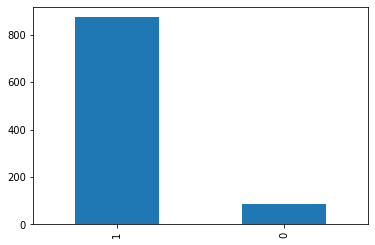

In [98]:
data.pol_cat.value_counts().plot.bar()
data.pol_cat.value_counts()

## Data Preprocessing

Lower the text in comments

In [99]:
data['comments'] = data['comments'].str.lower()

In [100]:
data['comments'].head()

0    i  heard  this  song  when  it  first  came  o...
1    it's  november  let's  see  how  many  legends...
2                         fantastically  fantastic    
3              the  first  song  that  i  listen  to  
6                         wow  what  a  great  voice  
Name: comments, dtype: object

In [101]:
data.describe()

,Likes,polarity,pol_cat
count,957.000000,957.000000,957.000000
mean,288.482759,0.344692,0.912226
std,1987.888014,0.336256,0.283114
min,0.000000,-1.000000,0.000000
25%,0.000000,0.140000,1.000000
50%,2.000000,0.350000,1.000000
75%,72.000000,0.500000,1.000000
max,41453.000000,1.000000,1.000000


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1351
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Video ID    957 non-null    object 
 1   Comment ID  957 non-null    object 
 2   comments    957 non-null    object 
 3   Likes       957 non-null    int64  
 4   polarity    957 non-null    float64
 5   pol_cat     957 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 52.3+ KB


In [103]:
data['comments'][0]

"i  heard  this  song  when  it  first  came  out  in  2014    now  i'm  16    it  brings  so  much  nostalgia  "

In [104]:
data['comments'][0].strip()

"i  heard  this  song  when  it  first  came  out  in  2014    now  i'm  16    it  brings  so  much  nostalgia"

In [105]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [107]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [108]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [109]:
stop_words = set(stopwords.words('english'))

In [110]:
data['comments'] = data['comments'].str.strip()

In [111]:
train = data.copy()

In [112]:
train['comments'] = train['comments'].str.strip()

In [113]:
train['comments'][0]

"i  heard  this  song  when  it  first  came  out  in  2014    now  i'm  16    it  brings  so  much  nostalgia"

In [114]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [115]:
data['stop_comments'] = data['comments'].apply(lambda x : remove_stopwords(x))

In [116]:
data.head()

,Video ID,Comment ID,comments,Likes,polarity,pol_cat,stop_comments
0,OPf0YbXqDm0,UgzqT4pCow3I1CmX9L94AaABAg,i heard this song when it first came o...,0,0.225,1,heard song first came 2014 'm 16 brings much n...
1,OPf0YbXqDm0,UgxrrhZJJtYojX17QFp4AaABAg,it's november let's see how many legends...,18,0.500,1,'s november let 's see many legends still list...
2,OPf0YbXqDm0,UgzkwVvj_apArv6Nd654AaABAg,fantastically fantastic,0,0.400,1,fantastically fantastic
3,OPf0YbXqDm0,UgwTARx1DXr-WdxlCz14AaABAg,the first song that i listen to,0,0.250,1,first song listen
6,OPf0YbXqDm0,UgwyIer02WwKCQsGI414AaABAg,wow what a great voice,0,0.450,1,wow great voice


In [117]:
data.to_csv('Dataset-with-sentiments.csv', index = False)